<a href="https://colab.research.google.com/github/Renuthiru/techno/blob/main/sms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from collections import Counter
import re

import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer


from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier

In [ ]:
df = pd.read_csv('spam.csv',encoding = "ISO-8859-1")
df.head()


,type,text,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1, inplace=True)


In [ ]:
df.shape

(5572, 2)

In [ ]:
SF = df.loc[(df.type == 'spam')]
SF.describe()

,type,text
count,747,747
unique,1,653
top,spam,Please call our customer service representativ...
freq,747,4


In [ ]:
df.describe()

,type,text
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [ ]:
df['length']=df['text'].apply(len)
df.head()

,type,text,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [ ]:
df.length.describe()

count    5572.000000
mean       80.119167
std        59.691288
min         2.000000
25%        36.000000
50%        61.000000
75%       121.000000
max       910.000000
Name: length, dtype: float64

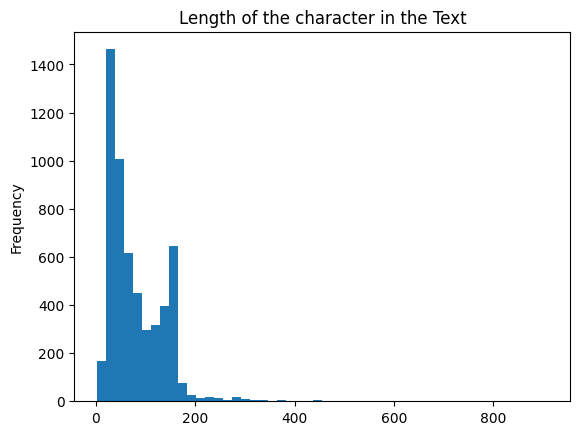

In [ ]:
df['length'].plot(bins=50,kind='hist').set_title("Length of the character in the Text")
plt.savefig('Length of the character in the Text.png')

In [ ]:
df[df['length']==910]['text'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

**Text Pre-processing**

In [ ]:
import string
mess = 'sample message!...'
nopunc=[char for char in mess if char not in string.punctuation]
nopunc=''.join(nopunc)
print(nopunc)

sample message


In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords
stopwords.words('english')[0:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [ ]:
nopunc.split()

['sample', 'message']

In [ ]:
clean_mess=[word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [ ]:
def text_process(mess):
    nopunc =[char for char in mess if char not in string.punctuation]
    nopunc=''.join(nopunc)
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [ ]:
# Original
df.head()

,type,text,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


Tokenization: process of converting the normal text strings in to a list of tokens (words that we actually want).

In [ ]:
# Printing lists of tokens (also known as lemmas)
df['text'].head(5).apply(text_process)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: text, dtype: object

In [ ]:
df.head()

,type,text,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


Vectorization

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
# here  we take one text message and get its bag-of-words counts as a vector, putting to use our new bow_transformer:
bow_transformer = CountVectorizer(analyzer=text_process).fit(df['text'])
print(len(bow_transformer.vocabulary_))

11304


In [ ]:
textat4=df['text'][3]
print(textat4)

U dun say so early hor... U c already then say...


In [ ]:
# pinting vector preseanttion of textat4
bow4=bow_transformer.transform([textat4])
print(bow4)
print(bow4.shape)


  (0, 3996)	2
  (0, 4551)	1
  (0, 5179)	1
  (0, 6118)	1
  (0, 6136)	1
  (0, 7091)	1
  (0, 9445)	2
(1, 11304)


In [ ]:
#Checking which appers twice
if type(bow_transformer) == CountVectorizer:
print(bow_transformer.get_feature_names()[4073])
print(bow_transformer.get_feature_names()[9570])

IndentationError: expected an indented block after 'if' statement on line 2 (<ipython-input-37-3ca0c9dd2fb9>, line 3)

In [ ]:
text_bow = bow_transformer.transform(df['text'])

In [ ]:
print('Shape of Sparse Matrix: ',text_bow.shape)
print('Amount of non-zero occurences:',text_bow.nnz)

Shape of Sparse Matrix:  (5572, 11304)
Amount of non-zero occurences: 50193


In [ ]:
sparsity =(100.0 * text_bow.nnz/(text_bow.shape[0]*text_bow.shape[1]))
print('sparsity:{}'.format(round(sparsity)))

sparsity:0


Term weighting and normalization can be done with TF-IDF


In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer=TfidfTransformer().fit(text_bow)
tfidf4 = tfidf_transformer.transform(bow4)
print(tfidf4)

  (0, 9445)	0.5391515179363724
  (0, 7091)	0.438375519235493
  (0, 6136)	0.3183143011307023
  (0, 6118)	0.2991551295536476
  (0, 5179)	0.2969195675145299
  (0, 4551)	0.26585776633899993
  (0, 3996)	0.40924708612713756


In [ ]:
# check what is the IDF (inverse document frequency) of the word
print(tfidf_transformer.idf_[bow_transformer.vocabulary_['love']])
print(tfidf_transformer.idf_[bow_transformer.vocabulary_['Free']])

4.773658523649919
5.775541185859478


In [ ]:
text_tfidf=tfidf_transformer.transform(text_bow)
print(text_tfidf.shape)

(5572, 11304)


In [ ]:
spam_detect_model = LogisticRegression()

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
from sklearn.model_selection import train_test_split
text_train,text_test,type_train,type_test = train_test_split(df['text'],df['type'],test_size=0.2)

In [ ]:

print(len(text_train),len(text_test),len(type_train),len(type_test))

4457 1115 4457 1115


In [ ]:
from sklearn.pipeline import Pipeline
pipeline = Pipeline([
   ( 'bow',CountVectorizer(analyzer=text_process)),
    ('tfidf',TfidfTransformer()),
    ('classifier',MultinomialNB()),
])
pipeline.fit(text_train,type_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x7c212c290a60>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [ ]:
predictions = pipeline.predict(text_test)
print('Naive Base Accuracy_score: ',accuracy_score(type_test,predictions))

Naive Base Accuracy_score:  0.9596412556053812


In [ ]:
print(classification_report(predictions,type_test))

              precision    recall  f1-score   support

         ham       1.00      0.96      0.98      1008
        spam       0.70      1.00      0.83       107

    accuracy                           0.96      1115
   macro avg       0.85      0.98      0.90      1115
weighted avg       0.97      0.96      0.96      1115



In [ ]:
#Extract SPAM messages
spam_messages = df[df["type"]=="spam"]
spam_messages.head() #Display first 5 rows of SPAM messages

,type,text,length
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
5,spam,FreeMsg Hey there darling it's been 3 week's n...,148
8,spam,WINNER!! As a valued network customer you have...,158
9,spam,Had your mobile 11 months or more? U R entitle...,154
11,spam,"SIX chances to win CASH! From 100 to 20,000 po...",136


In [ ]:
spam_messages.describe()

,length
count,747.000000
mean,138.866131
std,29.183082
min,13.000000
25%,132.500000
50%,149.000000
75%,157.000000
max,224.000000


In [ ]:
df.groupby('type').describe()

length                                                         
       count        mean        std   min    25%    50%    75%    max
type                                                                 
ham   4825.0   71.024041  58.016619   2.0   33.0   52.0   92.0  910.0
spam   747.0  138.866131  29.183082  13.0  132.5  149.0  157.0  224.0

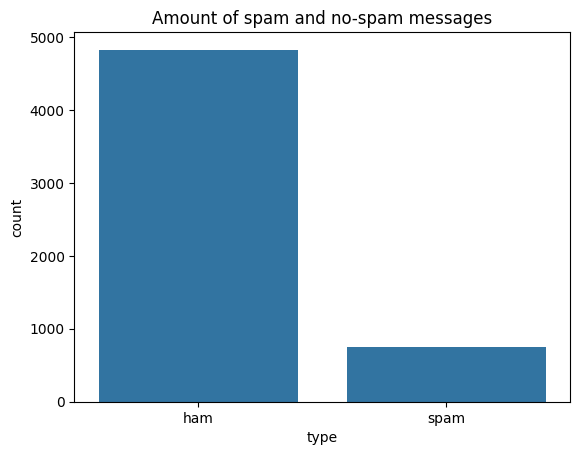

In [ ]:
sns.countplot(data = df, x= df["type"]).set_title("Amount of spam and no-spam messages")
plt.show()


<ipython-input-73-b196c049bce0>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ham, label='Ham')
<ipython-input-73-b196c049bce0>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(spam, label='Spam')


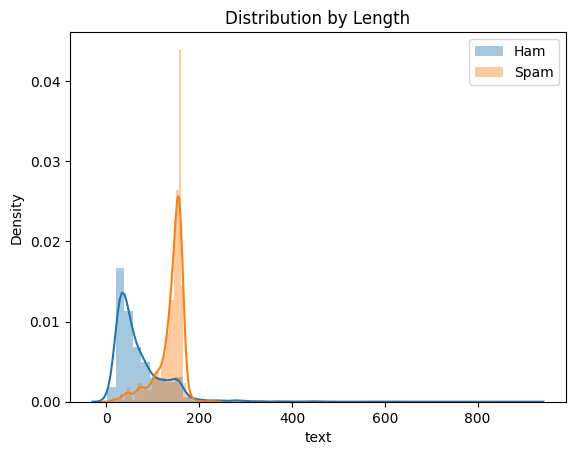

In [ ]:
spam_df = df[df['type'] == 'spam'] #create sub-dataframe of spam text
ham_df = df[df['type'] == 'ham'] #sub-dataframe of ham text
#sns.set()
#df.set_index('type').T.plot(kind='bar', stacked=True)
ham =df[df['type'] == 'ham']['text'].str.len()
sns.distplot(ham, label='Ham')
spam = df[df['type'] == 'spam']['text'].str.len()
sns.distplot(spam, label='Spam')
plt.title('Distribution by Length')
plt.legend()

plt.savefig('Distrbution of word by length.png')


<ipython-input-74-406116aade33>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  ham1 = df[df['type'] == 'ham']['text'].str.replace(r'\D+', '').str.len()
<ipython-input-74-406116aade33>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ham1, label='Ham')
<ipython-input-74-406116aade33>:5: FutureWarning: The default value of regex will change from True to False in a future version.
  spam1 = df[df['type'] == 'spam']['text'].str.replace(r'\D+', '').str.len()
<ipython-input-74-406116aade33>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adap

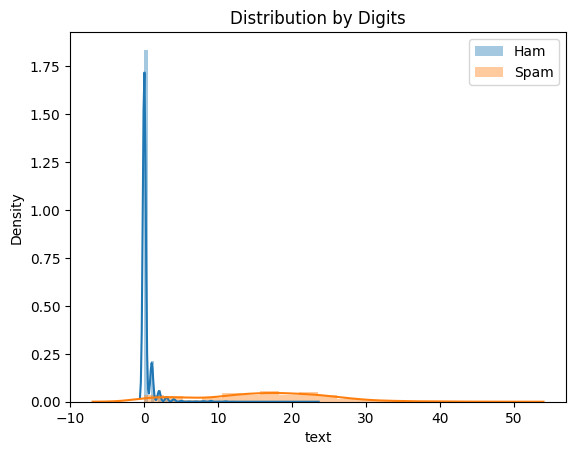

In [ ]:
#plotting graph by digits.

ham1 = df[df['type'] == 'ham']['text'].str.replace(r'\D+', '').str.len()
sns.distplot(ham1, label='Ham')
spam1 = df[df['type'] == 'spam']['text'].str.replace(r'\D+', '').str.len()
sns.distplot(spam1, label='Spam')
plt.title('Distribution by Digits')
plt.legend()
plt.savefig('Distrbution of word by Digits.png')

<ipython-input-75-4cebe2e38e53>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  ham2 = df[df['type'] == 'ham']['text'].str.replace(r'\w+', '').str.len()
<ipython-input-75-4cebe2e38e53>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ham2, label='Ham')
<ipython-input-75-4cebe2e38e53>:5: FutureWarning: The default value of regex will change from True to False in a future version.
  spam2 = df[df['type'] == 'spam']['text'].str.replace(r'\w+', '').str.len()
<ipython-input-75-4cebe2e38e53>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adap

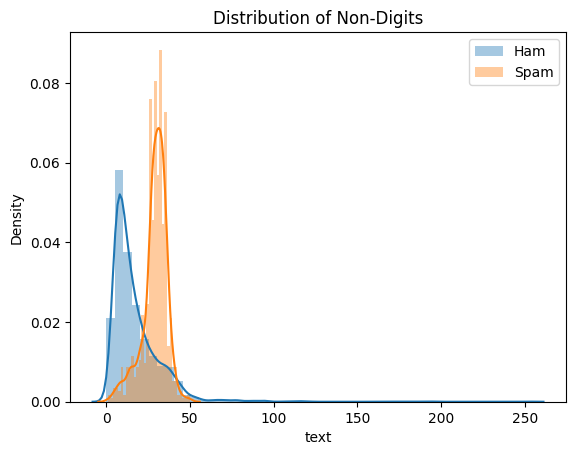

In [ ]:
#plotting graph for non-digits.

ham2 = df[df['type'] == 'ham']['text'].str.replace(r'\w+', '').str.len()
sns.distplot(ham2, label='Ham')
spam2 = df[df['type'] == 'spam']['text'].str.replace(r'\w+', '').str.len()
sns.distplot(spam2, label='Spam')
plt.title('Distribution of Non-Digits')
plt.legend()
plt.savefig('Distrbution of word by Non- Digits.png')

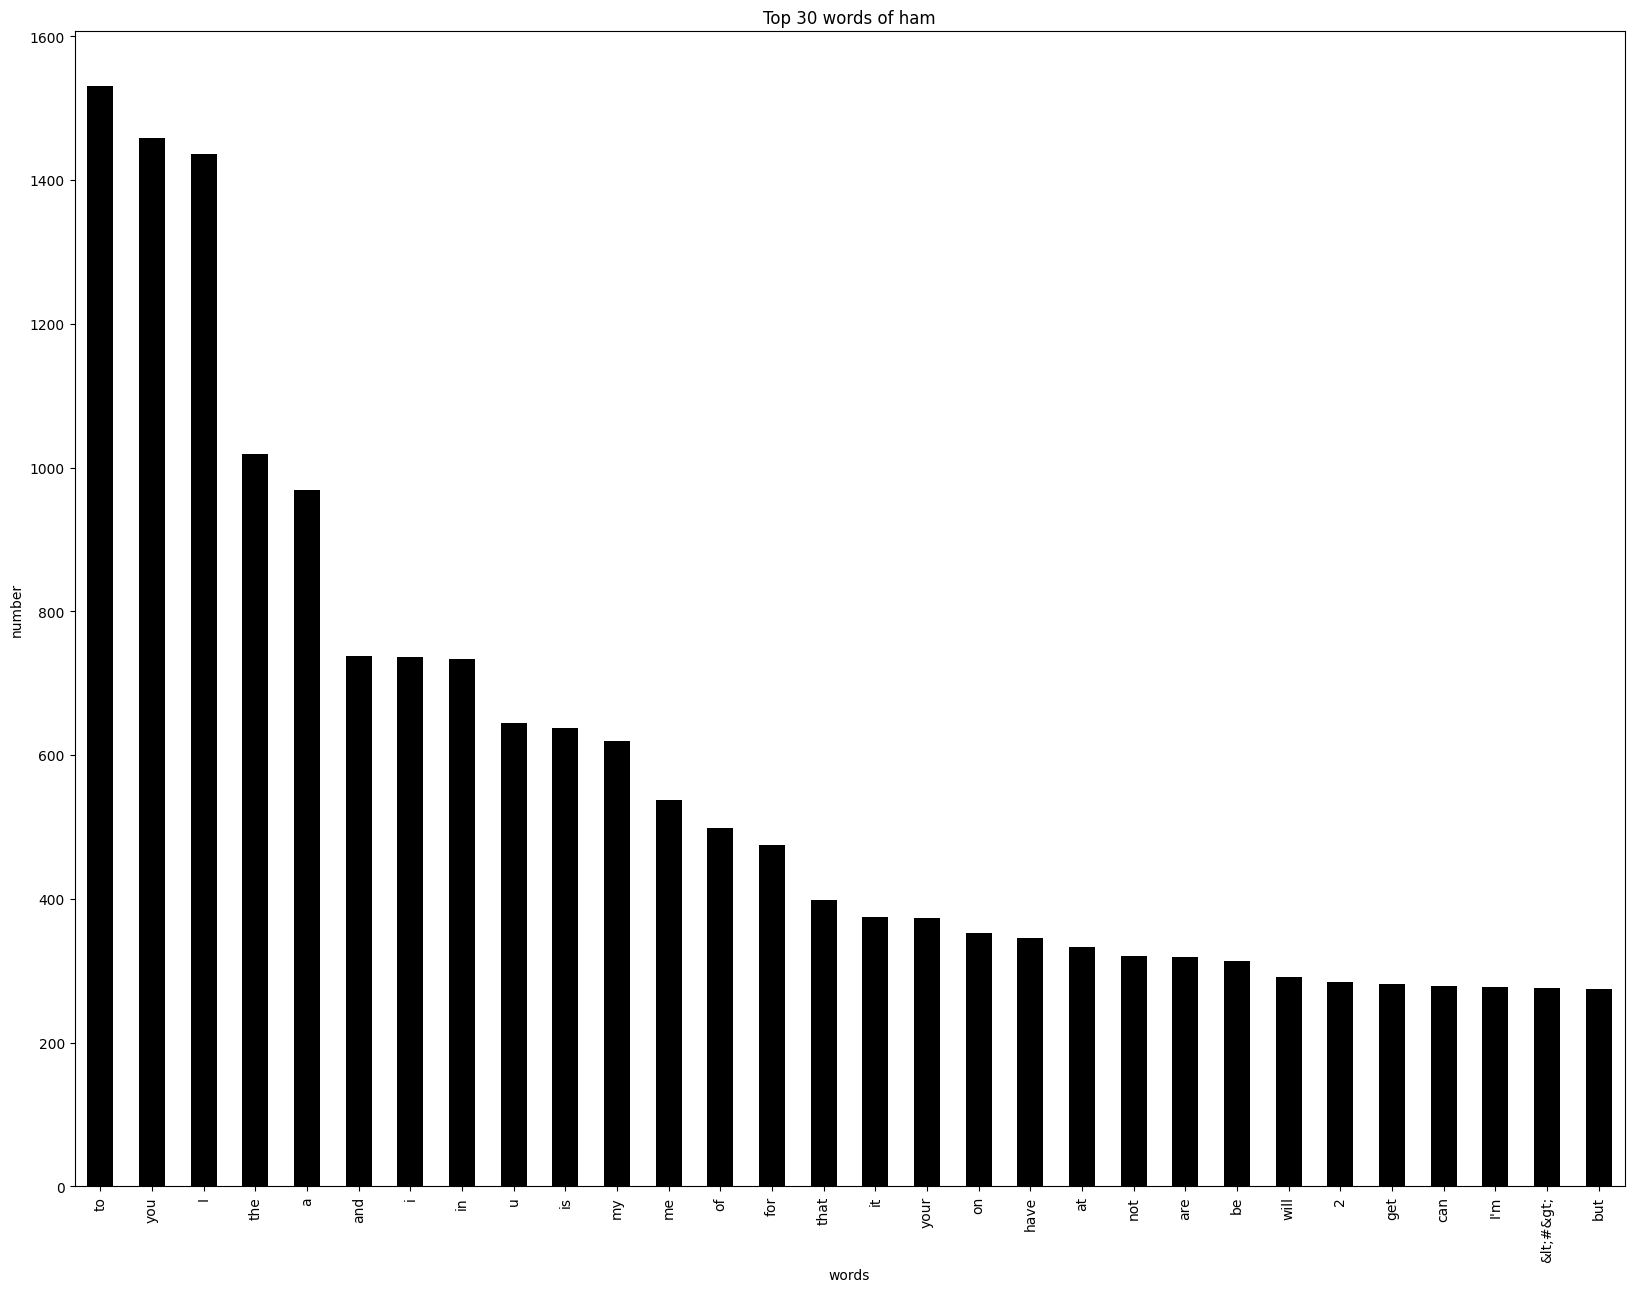

<Figure size 640x480 with 0 Axes>

In [ ]:
#for counting frequently occurence of spam and ham.

count1 = Counter(" ".join(df[df['type']=='ham']["text"]).split()).most_common(30)
data1 = pd.DataFrame.from_dict(count1)
data1 = data1.rename(columns={0: "words of ham", 1 : "count"})
count2 = Counter(" ".join(df[df['type']=='spam']["text"]).split()).most_common(30)
data2 = pd.DataFrame.from_dict(count2)
data2 = data2.rename(columns={0: "words of spam", 1 : "count_"})
data1.plot.bar(legend = False, color = 'black',figsize = (20,15))
y_pos = np.arange(len(data1["words of ham"]))
plt.xticks(y_pos, data1["words of ham"])
plt.title('Top 30 words of ham')
plt.xlabel('words')
plt.ylabel('number')
plt.show()

plt.savefig('Top30 words ham.png',dpi=199)


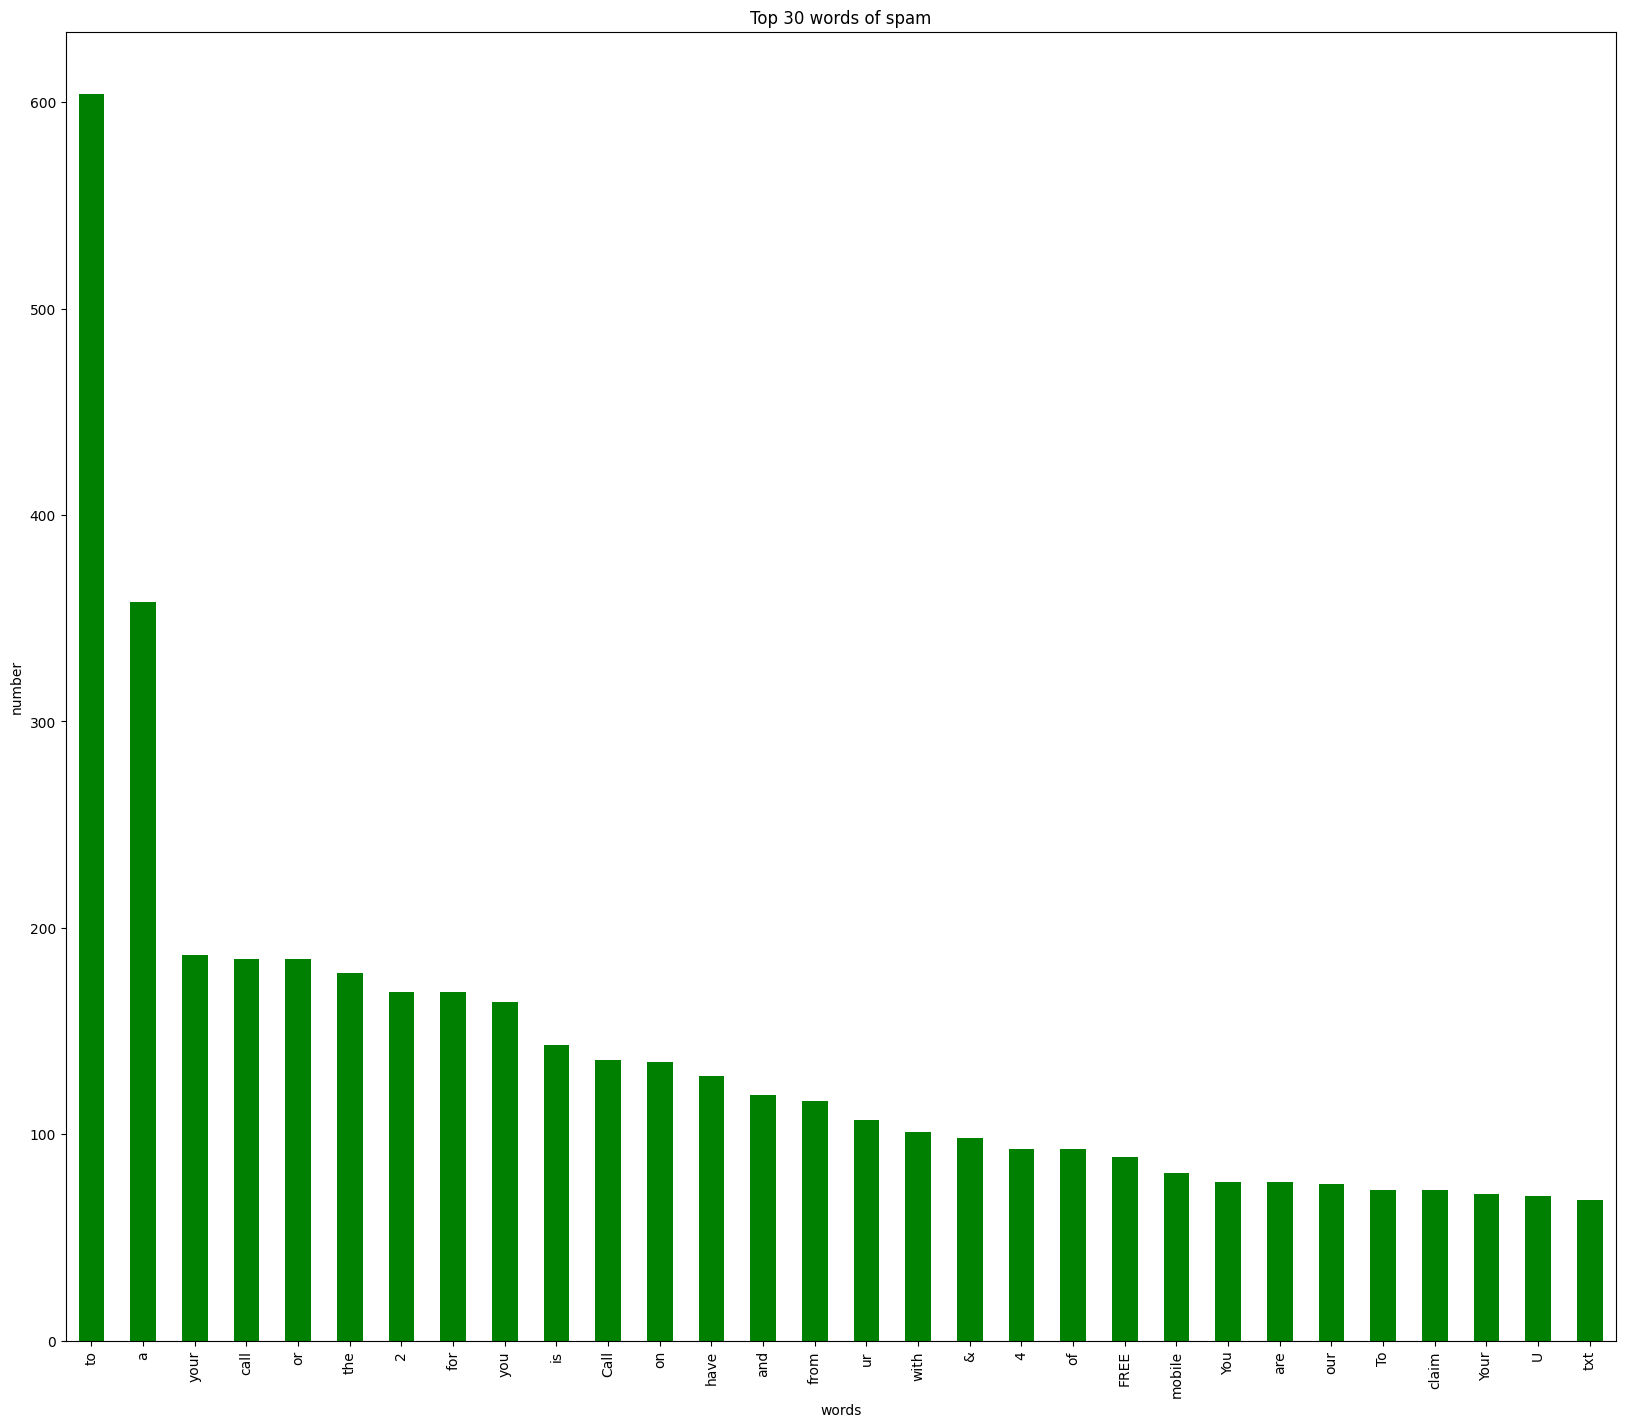

In [ ]:
data2.plot.bar(legend = False, color = 'green', figsize = (20,17))
y_pos = np.arange(len(data2["words of spam"]))
plt.xticks(y_pos, data2["words of spam"])
plt.title('Top 30 words of spam')
plt.xlabel('words')
plt.ylabel('number')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['type'], test_size = 0.3, random_state = 37)
print ("X_train: ", len(X_train))
print("X_test: ", len(X_test))
print("y_train: ", len(y_train))
print("y_test: ", len(y_test))

X_train:  3900
X_test:  1672
y_train:  3900
y_test:  1672


In [ ]:
corpus = []
for i in range(0, 5572):
    review = re.sub('[^a-zA-Z]', ' ', df['text'][i])
    review = review.lower()
    review = review.split()
    ps = PorterStemmer()
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review)
cv = CountVectorizer(max_features = 1500)
cv.fit(X_train)

CountVectorizer(max_features=1500)

In [ ]:
X_train_cv = cv.transform(X_train)
X_train_cv

<3900x1500 sparse matrix of type '<class 'numpy.int64'>'
	with 42787 stored elements in Compressed Sparse Row format>

In [ ]:
X_train_cv = cv.transform(X_train)
X_train_cv

<3900x1500 sparse matrix of type '<class 'numpy.int64'>'
	with 42787 stored elements in Compressed Sparse Row format>

**Naive Bayes Classification**

In [ ]:
import sklearn.naive_bayes

mnb = sklearn.naive_bayes.MultinomialNB(alpha = 0.5)
X_train = [[1, 2, 3], [4, 5, 6]]
y_train = [1, 2]
X_test_cv = [[1, 2, 3], [4, 5, 6]]
mnb.fit(X_train,y_train)

y_mnb = mnb.predict(X_test_cv)

In [ ]:
import numpy as np
import sklearn.metrics
y_test = np.array([1, 2])
print('Naive Bayes Accuracy: ', sklearn.metrics.accuracy_score( y_mnb , y_test))

print('Naive Bayes confusion_matrix: ', sklearn.metrics.confusion_matrix(y_mnb, y_test))

Naive Bayes Accuracy:  1.0
Naive Bayes confusion_matrix:  [[1 0]
 [0 1]]


**SVM Classification**

In [ ]:
import sklearn.svm
X_train_cv = [[1, 2, 3], [4, 5, 6]]


svc = sklearn.svm.SVC(kernel='sigmoid', gamma=1.0)

svc.fit(X_train_cv,y_train)
y_svc = svc.predict(X_test_cv)

In [ ]:
!pip install scikit-learn
from sklearn.metrics import accuracy_score, confusion_matrix
print('SVM Accuracy: ', accuracy_score( y_svc , y_test))
print('SVM confusion_matrix: ', confusion_matrix(y_svc, y_test))

SVM Accuracy:  0.5
SVM confusion_matrix:  [[0 0]
 [1 1]]


**Decision Tree Classification**

In [ ]:
import sklearn.tree



In [ ]:
dtc = sklearn.tree.DecisionTreeClassifier(min_samples_split=7, random_state=252)

In [ ]:
dtc.fit(X_train_cv,y_train)
y_dtc = dtc.predict(X_test_cv)

In [ ]:
print('Decision Tree Accuracy: ',accuracy_score(y_test,y_dtc))
print('Decision Tree confusion_matrix: ', confusion_matrix(y_dtc, y_test))

Decision Tree Accuracy:  0.5
Decision Tree confusion_matrix:  [[1 1]
 [0 0]]


**Extra Tree Classification**

In [ ]:
import sklearn.ensemble
etc = sklearn.ensemble.ExtraTreesClassifier(n_estimators=37, random_state=252)
etc.fit(X_train_cv,y_train)
y_etc = etc.predict(X_test_cv)

In [ ]:
print('Extra Tree Accuracy_score: ',accuracy_score(y_test,y_etc))
print('Extra Tree confusion_matrix: ', confusion_matrix(y_etc, y_test))
from sklearn.metrics import classification_report
print (classification_report(y_test, y_etc))

Extra Tree Accuracy_score:  1.0
Extra Tree confusion_matrix:  [[1 0]
 [0 1]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



**Random Forest Classification**

In [ ]:
import sklearn.ensemble

rfc = sklearn.ensemble.RandomForestClassifier(n_estimators=37, random_state=252)
rfc.fit(X_train_cv,y_train)
y_rfc = rfc.predict(X_test_cv)

In [ ]:
print('Random Forest Accuracy_score: ',accuracy_score(y_test,y_rfc))
print('Random Forest confusion_matrix: ', confusion_matrix(y_rfc, y_test))

Random Forest Accuracy_score:  1.0
Random Forest confusion_matrix:  [[1 0]
 [0 1]]


**Adaptive Boosting Classification**

In [ ]:
import sklearn.ensemble
abc = sklearn.ensemble.AdaBoostClassifier(n_estimators=37, random_state=252)
abc.fit(X_train_cv,y_train)
y_abc = abc.predict(X_test_cv)

In [ ]:
print('AdaBoost Accuracy_score: ',accuracy_score(y_test,y_abc))
print('AdaBoost confusion_matrix: ', confusion_matrix(y_abc, y_test))

AdaBoost Accuracy_score:  1.0
AdaBoost confusion_matrix:  [[1 0]
 [0 1]]


**Bagging Classification**

In [ ]:
import sklearn.ensemble
bc = sklearn.ensemble.BaggingClassifier(n_estimators=9, random_state=252)
bc.fit(X_train_cv,y_train)
y_bc = bc.predict(X_test_cv)

In [ ]:
print('Bagging Accuracy_score: ',accuracy_score(y_test,y_bc))
print('Bagging confusion_matrix: ', confusion_matrix(y_bc, y_test))

Bagging Accuracy_score:  1.0
Bagging confusion_matrix:  [[1 0]
 [0 1]]
